# Exercício Prático: Feature Engineering e Seleção de Atributos
## Cenário

Você foi contratado como cientista de dados por uma empresa de seguros. Seu objetivo é preparar os dados de clientes para um modelo de previsão de inadimplência.

O dataset foi parcialmente anonimizado, mas ainda contém informações úteis como:
- Idade
- Renda anual
- Número de dependentes
- Gênero
- Estado civil
- Valor de dívidas
- Status de inadimplência (0 ou 1)

Seu trabalho é aplicar as técnicas de *feature engineering* para tornar os dados prontos para modelagem.

---



## Importações

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
```


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## 1. Criação do Dataset de Exemplo

```python
# Dataset simulado
np.random.seed(42)

data = pd.DataFrame({
    'idade': np.random.randint(18, 70, 100),
    'renda_anual': np.append(np.random.normal(50000, 15000, 95), [300000, 400000, np.nan, np.nan, np.nan]),
    'dependentes': np.random.choice([0, 1, 2, 3, np.nan], 100),
    'genero': np.random.choice(['masculino', 'feminino', None], 100),
    'estado_civil': np.random.choice(['solteiro', 'casado', 'divorciado'], 100),
    'dividas': np.append(np.random.normal(10000, 3000, 95), [70000, 80000, 100000, 90000, 85000]),
    'inadimplente': np.random.choice([0, 1], 100)
})

data.head()
```


In [66]:
# Dataset simulado
np.random.seed(42)

data = pd.DataFrame({
    'idade': np.random.randint(18, 70, 100),
    'renda_anual': np.append(np.random.normal(50000, 15000, 95), [300000, 400000, np.nan, np.nan, np.nan]),
    'dependentes': np.random.choice([0, 1, 2, 3, np.nan], 100),
    'genero': np.random.choice(['masculino', 'feminino', None], 100),
    'estado_civil': np.random.choice(['solteiro', 'casado', 'divorciado'], 100),
    'dividas': np.append(np.random.normal(10000, 3000, 95), [70000, 80000, 100000, 90000, 85000]),
    'inadimplente': np.random.choice([0, 1], 100)
})

data.head()

,idade,renda_anual,dependentes,genero,estado_civil,dividas,inadimplente
0,56,21864.848417,2.0,feminino,solteiro,10196.947474,1
1,69,29498.267917,3.0,masculino,solteiro,10036.439527,0
2,46,59544.576625,0.0,masculino,casado,12792.802252,1
3,32,36399.189971,0.0,masculino,solteiro,8430.435719,0
4,60,57140.638811,1.0,None,divorciado,12847.428963,1


## 2. Tratamento de Dados Ausentes

1. Identifique as colunas com dados ausentes.
2. Aplique **imputação** para as colunas `renda_anual` e `dependentes`.

```python
# Seu código aqui
```


In [67]:
data['renda_anual'] = data['renda_anual'].interpolate(method='linear')
data['dependentes'] = data['dependentes'].interpolate(method='nearest')

data[['renda_anual', 'dependentes']].head(25)

,renda_anual,dependentes
0,21864.848417,2.0
1,29498.267917,3.0
2,59544.576625,0.0
3,36399.189971,0.0
4,57140.638811,1.0
5,69554.919026,1.0
6,53173.805185,2.0
7,58955.669693,3.0
8,36554.972253,1.0
9,48320.182692,0.0


## 3. Tratamento de Outliers

1. Visualize os outliers usando boxplots para `renda_anual` e `dividas`.
2. Aplique uma transformação de log em `renda_anual` e `dividas` para reduzir o impacto dos outliers.

```python
# Seu código aqui
```


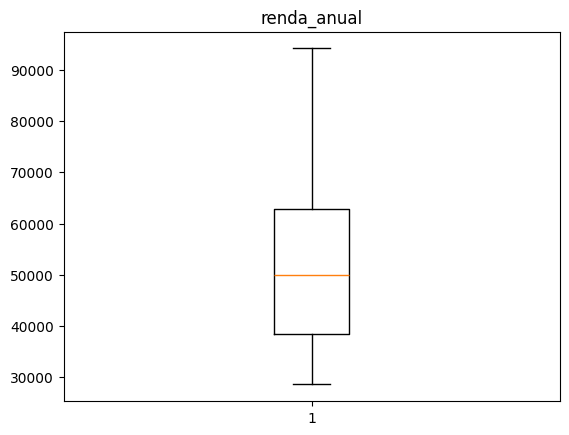

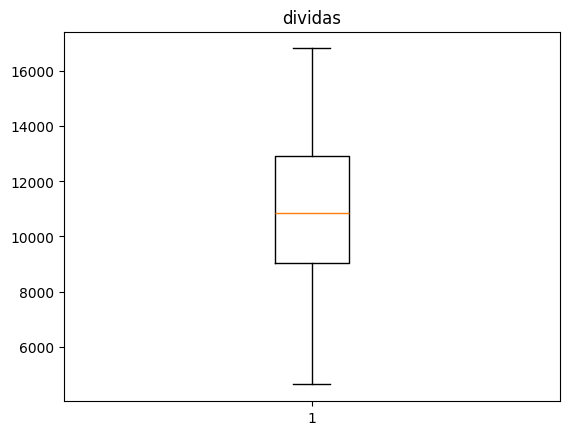

In [68]:
from scipy.stats.mstats import winsorize

data['renda_anual'] = winsorize(data['renda_anual'], limits=[0.05, 0.05])
data['dividas'] = winsorize(data['dividas'], limits=[0.05, 0.05])

plt.boxplot(data['renda_anual'])
plt.title('renda_anual')
plt.show()

plt.boxplot(data['dividas'])
plt.title('dividas')
plt.show()

## 4. Codificação de Variáveis Categóricas

1. Use **One Hot Encoding** para `estado_civil`.
2. Use **Label Encoding** para `genero`.

```python
# Seu código aqui
```


In [69]:
ohe = OneHotEncoder()
ohe.fit(data[['estado_civil']])
encoded_estado = ohe.transform(data[['estado_civil']]).toarray()
encoded_estado_df = pd.DataFrame(encoded_estado, columns=ohe.get_feature_names_out())
encoded_estado_df

,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
95,0.0,1.0,0.0
96,0.0,0.0,1.0
97,0.0,1.0,0.0
98,0.0,0.0,1.0


In [70]:
LE = LabelEncoder()
LE.fit(data[['genero']])
encoded_gen = LE.transform(data[['genero']]).toarray()
encoded_gen_df = pd.DataFrame(encoded_gen, columns=ohe.get_feature_names_out())
encoded_gen_df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

## 5. Redução de Dimensionalidade com PCA

1. Aplique `StandardScaler` nos dados numéricos.
2. Utilize `PCA` e reduza a dimensionalidade para 2 componentes principais.
3. Visualize a dispersão dos dados com `matplotlib`.

```python
# Seu código aqui
```
